# SM-6 Geophone response

Computation of the response function of a magnetic coil geophone following the model discussed in Section 12.3.2 of "Quantitative Seismology" by Aki and Richards (2002) and using the equations published on http://ds.iris.edu/NRL/sensors/hgs/passive_responses.html

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 125

In [2]:
import numpy as np
from numpy.fft import fftfreq
from obspy.signal.invsim import paz_to_freq_resp

In [3]:
bo = 0.56       # Open circuit damping due to the mechanical properties of the sensor
Rs = 8660.0     # Shunt resistor
Zamp = 2.0e6    # Input impedance of the preamp or datalogger
Rc = 375.0      # Feedback coil resistance (Ohm)
fo = 4.5        # Natural frequency (Hz)
m = 11.1e-3     # Mass (kg)
Go = 28.8       # Sensitivity (V/m/s)

In [4]:
# Parallel sum of Rs and Zamp 
if Rs == 0.0:
    Rload = Zamp
elif Zamp == 0.0:
    Rload = Rs
else:
    Rload = (Rs * Zamp) / (Rs + Zamp)
    
# Total resistance = Rc + Rload
Rt = Rc + Rload

In [5]:
omega = 2*np.pi*fo
# Update gain to effective sensitivity
Ge = Go*(Rload/Rt)
# Compute damping factors (Equations 12.49 and 12.51)
bc = np.power(Go, 2)/(2*omega*m*Rt)
bt = bo + bc
RtBcFn = Rt*bc*fo

In [6]:
print('Intrinsic sensitivity: {:2.2f} V/m/s'.format(Go))
print('Effective sensitivity: {:2.2f} V/m/s'.format(Ge))
print('Damping due to electrical current: {:3.3f}'.format(bc))
print('Damping total: {:3.3f}'.format(bt))
print('RtBcFn factor: {:3.0f} Ohm.Hz'.format(RtBcFn))

Intrinsic sensitivity: 28.80 V/m/s
Effective sensitivity: 27.60 V/m/s
Damping due to electrical current: 0.147
Damping total: 0.707
RtBcFn factor: 5946 Ohm.Hz


In [7]:
# Simple poles and zeros of response function (Equation 12.3)
s_1 = (-omega*bt) + 1j*(omega*np.sqrt(1-np.power(bt, 2)))
s_2 = np.conj(s_1)
z_1 = 0.0
z_2 = 0.0
poles = [s_1, s_2]
zeros = [z_1, z_2]

In [8]:
print(poles)

[(-19.986056173584718+19.999887877549572j), (-19.986056173584718-19.999887877549572j)]


In [9]:
print(zeros)

[0.0, 0.0]


In [10]:
t_samp = 1./200
nfft = 2048

H,f = paz_to_freq_resp(poles, zeros, Ge, t_samp, nfft, freq=True)

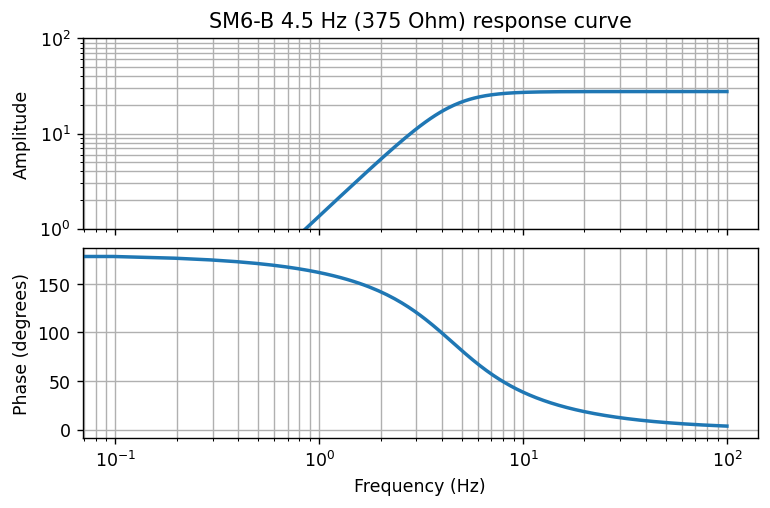

In [11]:
fig, ax = plt.subplots(2, sharex=True, figsize=(6, 4 ))
ax[0].set_title('SM6-B 4.5 Hz (375 Ohm) response curve')
ax[0].loglog(f,abs(H),linewidth=2.0)
ax[0].set_ylim([1, 100])
ax[0].grid(which='both')
#ax[0].legend()
ax[0].set(ylabel='Amplitude')


phase = np.angle(H, deg=True)
ax[1].semilogx(f,phase,linewidth=2.0)
#ax[1].set_ylim([-90,90])
ax[1].grid(which='both')
ax[1].set(xlabel='Frequency (Hz)',ylabel='Phase (degrees)')

fig = plt.gcf()
# make room for title and colorbars
fig.subplots_adjust(bottom=0.05, top=0.85, left=0.1, right=1,
                    hspace=0.1)

fig.align_ylabels(ax)

plt.show()